Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
Model Performance on Test Set:
Mean Absolute Error (MAE): 80,879.10
Root Mean Squared Error (RMSE): 100,444.06
R² Score: 0.9180
Predicted house value for sample: $1,173,819.39


C:\Users\visha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


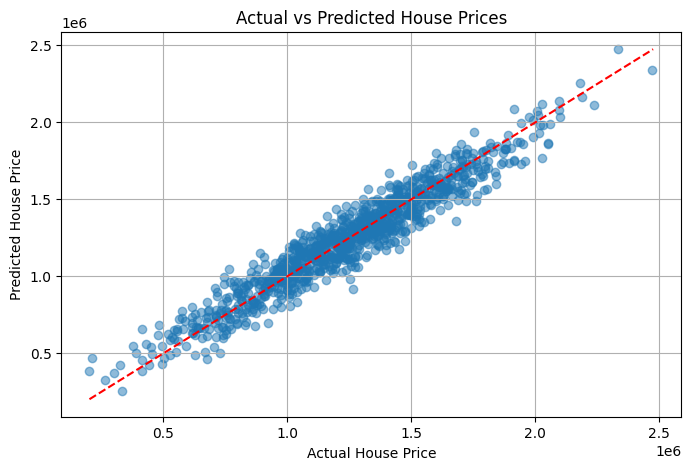

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load the dataset
df = pd.read_csv('housing.csv')

# 2. Inspect the columns
print(df.columns)

# 3. Select features and target (drop 'Address')
features = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms',
    'Area Population'
]
X = df[features]
y = df['Price']

# 4. Handle missing values, if any
X = X.fillna(X.median())

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature scaling (optional but helps for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 8. Evaluation
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, preds):,.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, preds)):,.2f}")
    print(f"R² Score: {r2_score(y_test, preds):.4f}")

print("Model Performance on Test Set:")
evaluate_model(model, X_test_scaled, y_test)

# 9. Sample Prediction
sample = [[70000, 6, 7, 4, 30000]] # Example values
sample_scaled = scaler.transform(sample)
pred_price = model.predict(sample_scaled)
print(f"Predicted house value for sample: ${pred_price[0]:,.2f}")

# 10. Actual vs. Predicted Plot
y_pred = model.predict(X_test_scaled)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # y=x line
plt.grid(True)
plt.show()
